#  Subject 1: CO2 concentration in the atmosphere since 1958

In [ ]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [ ]:
# Téléchargement et chargement des données
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

In [ ]:
# Charger les données à partir d'un fichier CSV local
data_file = "weekly_in_situ_co2.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [ ]:
# Charger les données dans une table de pandas
# data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], index_col=[0], names = ['Date', 'Concentration'])
data = pd.read_csv(data_file, skiprows=44, names = ['Date', 'Concentration'])
# Affichage des premières lignes des données pour vérification
print(data.head())

In [ ]:
# data_subset = data.dropna()

In [ ]:
# Réalisation du graphique complet
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Concentration'], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Réalisation du graphique pour montrer l'oscillation (300 dernières lignes du tableau)
plt.figure(figsize=(15, 6))
plt.plot(data['Date'][-300:], data['Concentration'][-300:], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Convertir la columna 'Date' a tipo de datos de fecha
data['Date'] = pd.to_datetime(data['Date'])
# Extrayez l'année de la colonne 'Date' et créez une nouvelle colonne 'Année'
data['Year'] = data['Date'].dt.year
print(data.head())

In [ ]:
# Calculez la valeur moyenne par an et créez une nouvelle colonne 'Concentration moyenne de CO2'
data['Mean CO2 Concentration'] = data.groupby('Year')['Concentration'].transform('mean')
print(data.head())

In [ ]:
# Création du graphique pour montrer la concentration moyenne de CO2 par an au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Mean CO2 Concentration'], label='Mean CO2 Concentration')
plt.title('Mean CO2 Concentration per Year Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

# Subject 4: Latency and capacity estimation for a network connection from asymmetric measurements


In [4]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [5]:
# Importation des bibliothèques nécessaires
url_liglab2 = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/liglab2.log.gz"
url_stackoverflow = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/stackoverflow.log.gz"

# Charger les données dans un DataFrame pandas
df_liglab2 = pd.read_csv(url_liglab2, sep=" ", header=None)
df_stackoverflow = pd.read_csv(url_stackoverflow, sep=" ", header=None)

In [6]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())


                     0     1      2     3                   4               5  \
0  [1421761682.052172]   665  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
1  [1421761682.277315]  1373  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
2  [1421761682.502054]   262  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
3  [1421761682.729257]  1107  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
4  [1421761682.934648]  1128  bytes  from  lig-publig.imag.fr  (129.88.11.7):   

            6       7          8   9  
0  icmp_seq=1  ttl=60  time=22.5  ms  
1  icmp_seq=1  ttl=60  time=21.2  ms  
2  icmp_seq=1  ttl=60  time=21.2  ms  
3  icmp_seq=1  ttl=60  time=23.3  ms  
4  icmp_seq=1  ttl=60  time=1.41  ms  


In [7]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

                     0     1      2     3                  4  \
0  [1421771203.082701]  1257  bytes  from  stackoverflow.com   
1  [1421771203.408254]   454  bytes  from  stackoverflow.com   
2  [1421771203.739730]   775  bytes  from  stackoverflow.com   
3  [1421771204.056630]  1334  bytes  from  stackoverflow.com   
4  [1421771204.372224]    83  bytes  from  stackoverflow.com   

                    5           6       7         8   9  
0  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
1  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
2  (198.252.206.140):  icmp_seq=1  ttl=50  time=126  ms  
3  (198.252.206.140):  icmp_seq=1  ttl=50  time=112  ms  
4  (198.252.206.140):  icmp_seq=1  ttl=50  time=111  ms  


In [8]:
import numpy as np

# Définir une fonction pour extraire les informations pertinentes de chaque ligne
def process_ping_data(df):
    df.dropna(inplace=True)  # Supprimer les lignes incomplètes
    df.columns = ["date", "size", "bytes", "from", "url", "ip", "icmp","ttl","time", "ms"]  # Nommez les colonnes
    df["time"] = df["time"].str[5:].astype(float)  # Nommez les colonnes
    df["date"] = df["date"].str[1:18]
    df["date"] = pd.to_datetime(df["date"], unit='s')
    return df

# Traiter les données ping pour liglab2 et stackoverflow
df_liglab2 = process_ping_data(df_liglab2)
df_stackoverflow = process_ping_data(df_stackoverflow)


In [9]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())

                        date  size  bytes  from                 url  \
0 2015-01-20 13:48:02.052172   665  bytes  from  lig-publig.imag.fr   
1 2015-01-20 13:48:02.277315  1373  bytes  from  lig-publig.imag.fr   
2 2015-01-20 13:48:02.502054   262  bytes  from  lig-publig.imag.fr   
3 2015-01-20 13:48:02.729257  1107  bytes  from  lig-publig.imag.fr   
4 2015-01-20 13:48:02.934648  1128  bytes  from  lig-publig.imag.fr   

               ip        icmp     ttl   time  ms  
0  (129.88.11.7):  icmp_seq=1  ttl=60  22.50  ms  
1  (129.88.11.7):  icmp_seq=1  ttl=60  21.20  ms  
2  (129.88.11.7):  icmp_seq=1  ttl=60  21.20  ms  
3  (129.88.11.7):  icmp_seq=1  ttl=60  23.30  ms  
4  (129.88.11.7):  icmp_seq=1  ttl=60   1.41  ms  


In [10]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

                        date  size  bytes  from                url  \
0 2015-01-20 16:26:43.082701  1257  bytes  from  stackoverflow.com   
1 2015-01-20 16:26:43.408254   454  bytes  from  stackoverflow.com   
2 2015-01-20 16:26:43.739730   775  bytes  from  stackoverflow.com   
3 2015-01-20 16:26:44.056630  1334  bytes  from  stackoverflow.com   
4 2015-01-20 16:26:44.372224    83  bytes  from  stackoverflow.com   

                   ip        icmp     ttl   time  ms  
0  (198.252.206.140):  icmp_seq=1  ttl=50  120.0  ms  
1  (198.252.206.140):  icmp_seq=1  ttl=50  120.0  ms  
2  (198.252.206.140):  icmp_seq=1  ttl=50  126.0  ms  
3  (198.252.206.140):  icmp_seq=1  ttl=50  112.0  ms  
4  (198.252.206.140):  icmp_seq=1  ttl=50  111.0  ms  


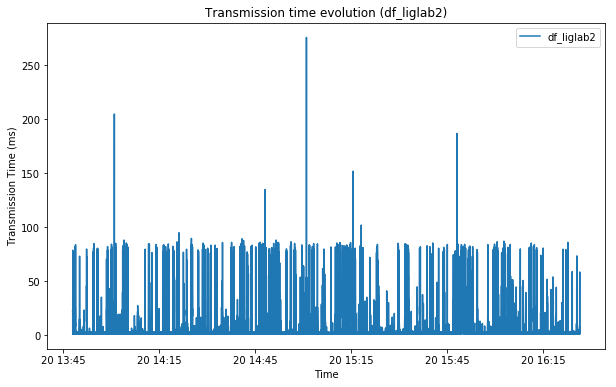

In [11]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["date"], df_liglab2["time"], label="df_liglab2")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_liglab2)")
plt.legend()
plt.show()

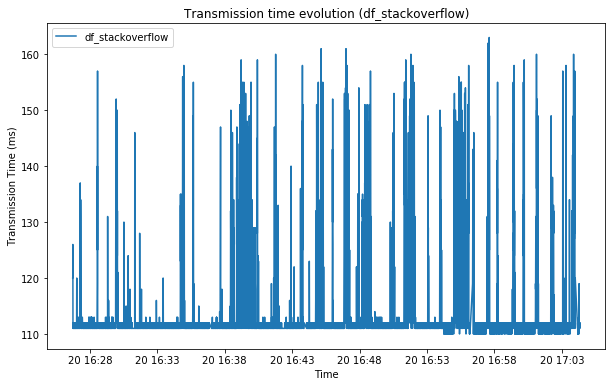

In [12]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["date"], df_stackoverflow["time"], label="df_stackoverflow")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()

In [ ]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["size"], df_liglab2["time"], label="liglab2")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (liglab2)")
plt.legend()
plt.show()

In [ ]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["size"], df_stackoverflow["time"], label="df_stackoverflow")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()